In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    '/Users/mig/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


In [15]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

naive_bayes = GaussianNB() # создаём экземпляр класса
naive_bayes.fit(X, y) # обучение модели
predicted_bayes = naive_bayes.predict(X) # предсказание (эксплуатация модели)

accuracyBayes = f1_score(y, predicted_bayes, average='weighted')

print(f'Точность предсказаний GaussianNB: {accuracyBayes}')

tree = DecisionTreeClassifier()
tree.fit(X, y)
predicted_tree = tree.predict(X)
accuracyTree = f1_score(y, predicted_tree, average='weighted')

print(f'Точность предсказаний DecisionTreeClassifier: {accuracyTree}')

neighbors = KNeighborsClassifier()
neighbors.fit(X, y)
predicted_neighbors = neighbors.predict(X)
accuracyNeighbors = f1_score(y, predicted_neighbors, average='weighted')

print(f'Точность предсказаний KNeighborsClassifier: {accuracyNeighbors}')

regression = LogisticRegression()
regression.fit(X, y)
predicted_regression = regression.predict(X)
accuracyRegression = f1_score(y, predicted_regression, average='weighted')

print(f'Точность предсказаний LogisticRegression: {accuracyRegression}')

forest = RandomForestClassifier()
forest.fit(X, y)
predicted_forest = forest.predict(X)
accuracyForest = f1_score(y, predicted_forest, average='weighted')

print(f'Точность предсказаний RandomForestClassifier: {accuracyForest}')

Точность предсказаний GaussianNB: 0.9498119457062514
Точность предсказаний DecisionTreeClassifier: 1.0
Точность предсказаний KNeighborsClassifier: 0.979846223428313
Точность предсказаний LogisticRegression: 0.979846223428313
Точность предсказаний RandomForestClassifier: 1.0


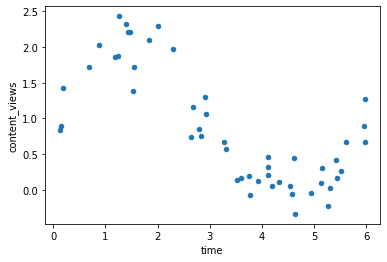

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/Users/mig/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)


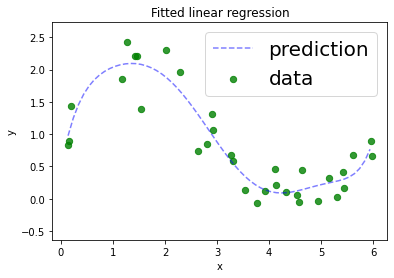

In [55]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 7)
X_test_5 = generate_degrees(X_test, 7)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 7)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [56]:
print(
    f'коэффициенты линейной регрессии w={reg_5.coef_},\n',
    f'качество модели {reg_5.score(X_test_5, y_test):.4f}'
)

коэффициенты линейной регрессии w=[ 4.3790e+00 -5.4796e+00  4.1459e+00 -1.8821e+00  4.6330e-01 -5.6876e-02
  2.7370e-03],
 качество модели 0.9142
